<a href="https://colab.research.google.com/github/Jakelinecs/Tareas-Machine-Learning/blob/main/N11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import skew, kurtosis

sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

try:
    original_data = pd.read_csv('train.csv')

    cols_to_drop = original_data.columns[original_data.isnull().sum() >= 5]
    data_cleaned = original_data.drop(columns=cols_to_drop)

    data = data_cleaned.dropna().copy()

    print(f"✅ データ準備完了。最終的なデータ形状: {data.shape}")
except FileNotFoundError:
    print("❌ エラー: 'train.csv' が見つかりません。")
    data = pd.DataFrame()

✅ データ準備完了。最終的なデータ形状: (1459, 63)


In [7]:
################################################################################

In [8]:
if not data.empty:
    print("\n--- 1. 各特徴量の型と欠損値の有無 (data.info()) ---")
    data.info(verbose=False) # 簡潔に表示

    print("\n--- 2. 目的変数 (SalePrice) の記述統計量 ---")
    print(data['SalePrice'].describe())

    print("\n--- 3. 数値特徴量の基本統計量 (data.describe().T) ---")
    print(data.describe().T)


--- 1. 各特徴量の型と欠損値の有無 (data.info()) ---
<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Columns: 63 entries, Id to SalePrice
dtypes: int64(35), object(28)
memory usage: 729.5+ KB

--- 2. 目的変数 (SalePrice) の記述統計量 ---
count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

--- 3. 数値特徴量の基本統計量 (data.describe().T) ---
                count           mean           std      min       25%  \
Id             1459.0     730.054832    421.411181      1.0     365.5   
MSSubClass     1459.0      56.881426     42.310746     20.0      20.0   
LotArea        1459.0   10517.363948   9984.666267   1300.0    7549.0   
OverallQual    1459.0       6.100069      1.383171      1.0       5.0   
OverallCond    1459.0       5.575737      1.113079      1.0       5.0   
YearBuilt      1459.0    1971.244003     30.199555   1872.0    195

In [ ]:
################################################################################


--- 最終的な欠損値の確認 ---
残存する欠損値の合計: 0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27424 (\N{CJK UNIFIED IDEOGRAPH-6B20}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

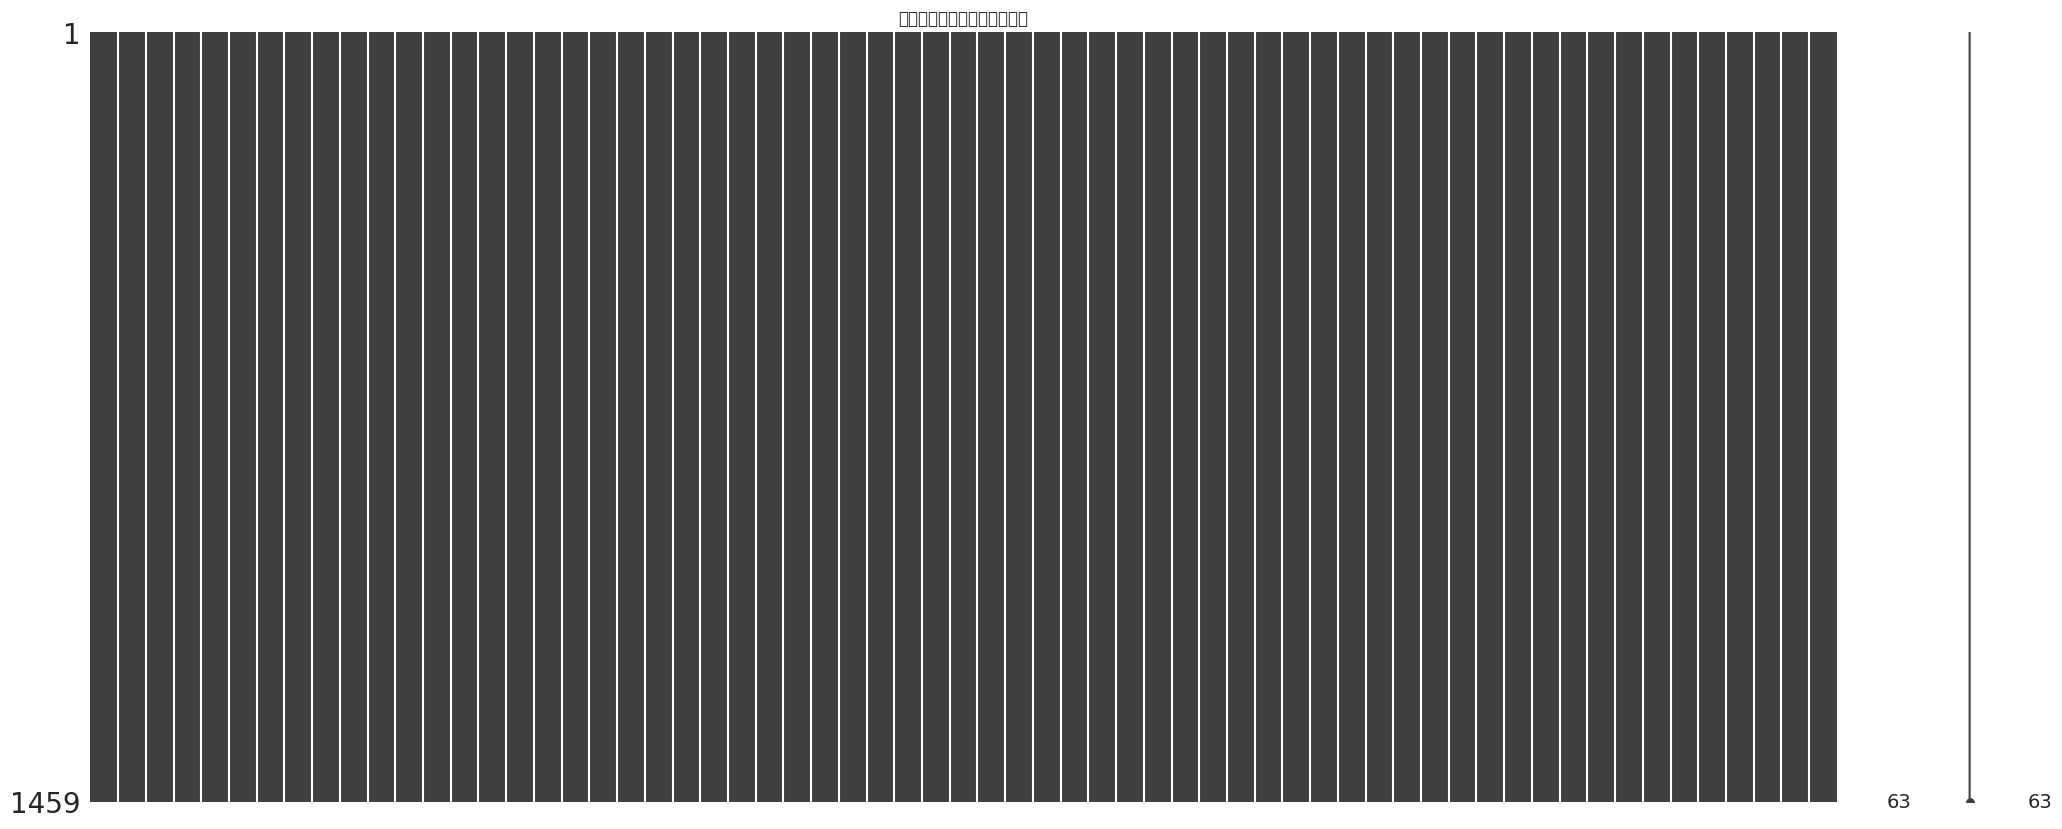

Series([], dtype: float64)


In [12]:
if not data.empty:
    print("\n--- 最終的な欠損値の確認 ---")
    print(f"残存する欠損値の合計: {data.isnull().sum().sum()}")
    msno.matrix(data)
    plt.title('欠損値マトリクス（処理後）')
    plt.show()

missing_ratio = data.isnull().sum() / len(data)
print(missing_ratio[missing_ratio > 0])

In [13]:
################################################################################

/tmp/ipython-input-2848236575.py:14: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2848236575.py:14: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2848236575.py:14: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2848236575.py:14: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2848236575.py:14: UserWarning: Glyph 25563 (\N{CJK UNIFIED IDEOGRAPH-63DB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2848236575.py:14: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2848236575.py:14: UserWarning: Glyph 27498 (\N{CJK UNIFIED IDEOGRAPH-6B6A}) missing from 

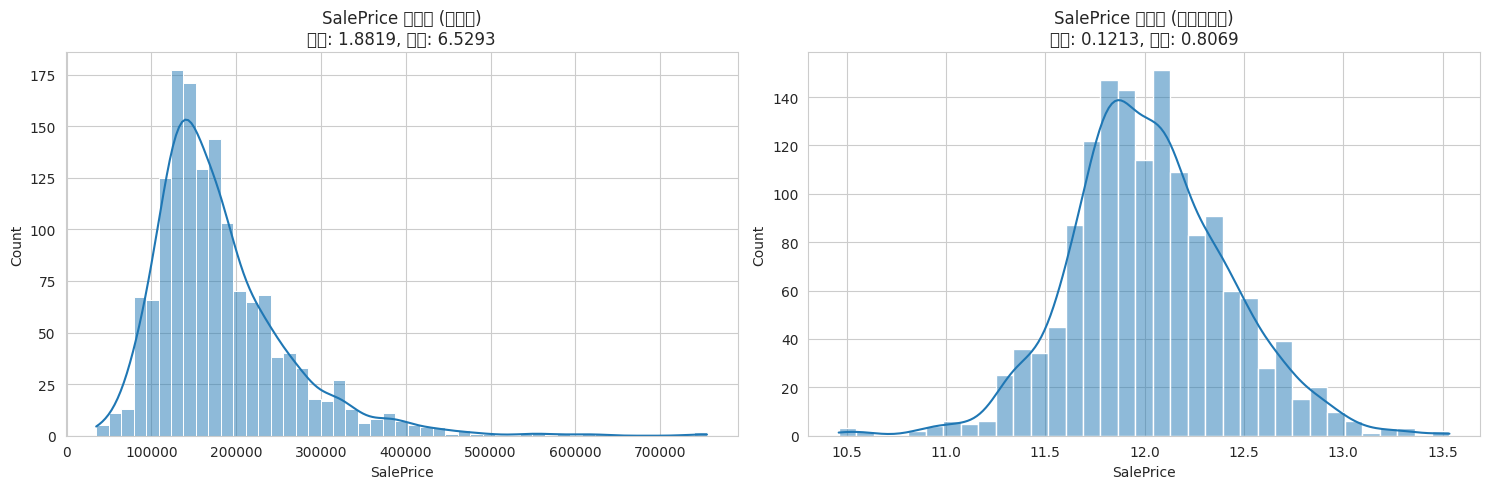


--- 対数変換による分布の変化 ---
【変換前】: SalePriceの分布は**正の歪度** (1.88) を持ち、右側に長い裾を持つ**右歪み**の形状です。また、**尖度** (6.53) も正の値で、正規分布より尖っています。これは、少数の高額な住宅がデータに含まれていることを示しています。
【対数変換後】: 対数変換後の分布は、歪度 (0.12) と尖度 (0.81) の絶対値が大幅に小さくなり、**正規分布**（ベルカーブ）に非常に近い対称的な形状になりました。
【正規分布への変換の重要性】: 線形回帰などの多くの統計的モデルや機械学習アルゴリズムは、予測誤差が**正規分布**に従う（または目的変数自体が正規分布に近い）ことを前提としています。対数変換により、この前提条件を満たすことができ、モデルの予測精度や安定性を向上させる効果が期待できます。


In [14]:
if not data.empty:

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data['SalePrice'], kde=True)
    plt.title(f"SalePrice の分布 (変換前)\n歪度: {data['SalePrice'].skew():.4f}, 尖度: {data['SalePrice'].kurtosis():.4f}")

    log_price = np.log(data['SalePrice'])

    plt.subplot(1, 2, 2)
    sns.histplot(log_price, kde=True)
    plt.title(f"SalePrice の分布 (対数変換後)\n歪度: {log_price.skew():.4f}, 尖度: {log_price.kurtosis():.4f}")
    plt.tight_layout()
    plt.show()

    print("\n--- 対数変換による分布の変化 ---")
    print(f"【変換前】: SalePriceの分布は**正の歪度** ({data['SalePrice'].skew():.2f}) を持ち、右側に長い裾を持つ**右歪み**の形状です。また、**尖度** ({data['SalePrice'].kurtosis():.2f}) も正の値で、正規分布より尖っています。これは、少数の高額な住宅がデータに含まれていることを示しています。")
    print(f"【対数変換後】: 対数変換後の分布は、歪度 ({log_price.skew():.2f}) と尖度 ({log_price.kurtosis():.2f}) の絶対値が大幅に小さくなり、**正規分布**（ベルカーブ）に非常に近い対称的な形状になりました。")
    print(f"【正規分布への変換の重要性】: 線形回帰などの多くの統計的モデルや機械学習アルゴリズムは、予測誤差が**正規分布**に従う（または目的変数自体が正規分布に近い）ことを前提としています。対数変換により、この前提条件を満たすことができ、モデルの予測精度や安定性を向上させる効果が期待できます。")

In [15]:
################################################################################

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  fig.canvas

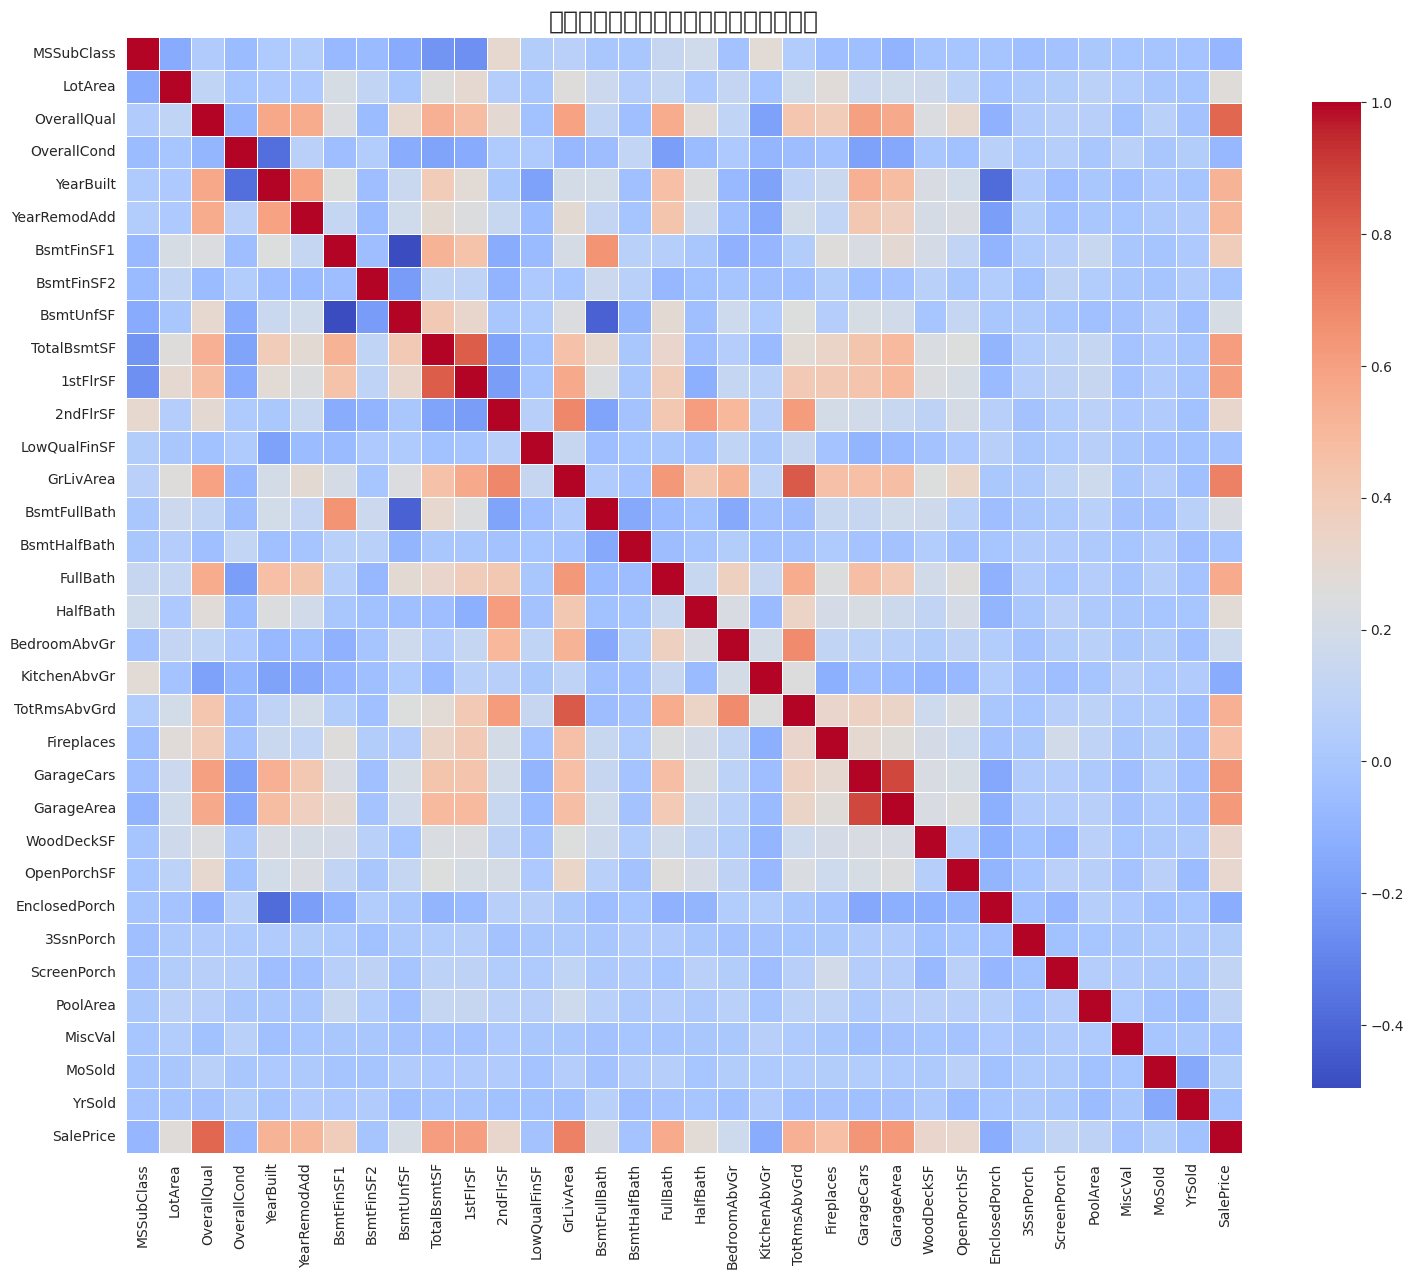

In [17]:
if not data.empty:
    numeric_data = data.select_dtypes(include=[np.number]).drop(columns=['Id'])

    corr_matrix = numeric_data.corr()

    plt.figure(figsize=(18, 16))
    sns.heatmap(corr_matrix, cmap='coolwarm', square=True, fmt=".1f",
                cbar_kws={'shrink': 0.8}, linewidths=0.5)
    plt.title('全数値特徴量間の相関係数ヒートマップ', fontsize=18)
    plt.show()
    #


--- 目的変数 SalePrice と相関の高い特徴量 Top 10 ---
SalePrice       1.000000
OverallQual     0.791069
GrLivArea       0.708618
GarageCars      0.640473
GarageArea      0.623423
TotalBsmtSF     0.613905
1stFlrSF        0.605968
FullBath        0.560881
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
Name: SalePrice, dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

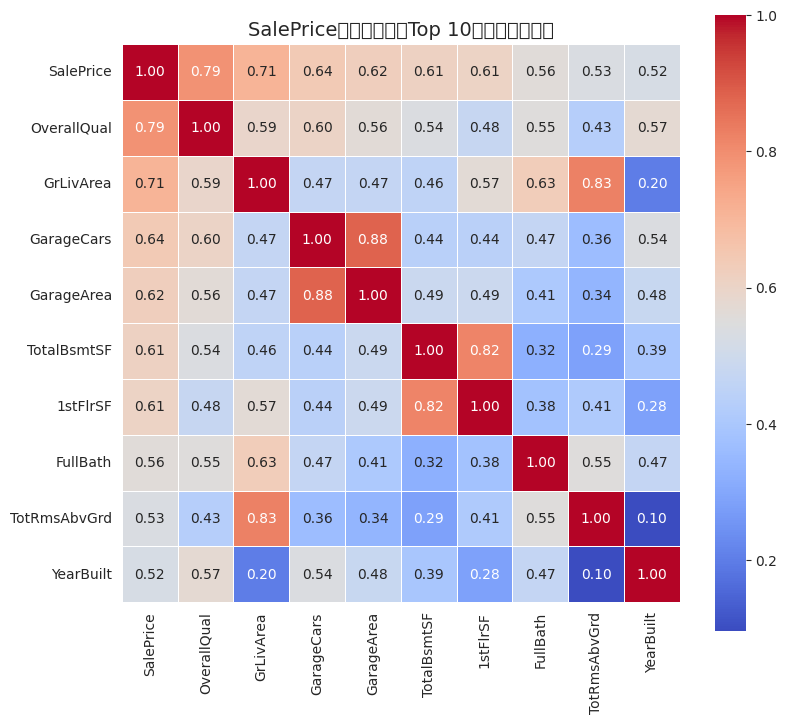

In [18]:
if not data.empty:
    corr_with_price = corr_matrix['SalePrice'].sort_values(ascending=False)

    top_10_features = corr_with_price.head(10).index.tolist()

    print("\n--- 目的変数 SalePrice と相関の高い特徴量 Top 10 ---")
    print(corr_with_price.head(10))

    top_10_corr_matrix = data[top_10_features].corr()

    plt.figure(figsize=(9, 8))
    sns.heatmap(top_10_corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f", linewidths=0.5)
    plt.title('SalePriceと相関の高いTop 10特徴量間の相関', fontsize=14)
    plt.show()
    #